----
# Meal review - Basic data analysis
---
It's a homework of FDA course.(HW1 PART1)
>dataset:
This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plaintext review. We also have reviews from all other Amazon categories.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [3]:
data = pd.read_csv('Reviews.csv')
data = data[:10000]

## 1. Top-10 Reviewer
To count the frequency of UserId, I make four lists to record every UserId's information, such as ProfileName.
Combined the four lists as a dataframe, and then sort it with the ScoreCount.

In [5]:
ID=[]
Profile=[]
ScoreCount=[]
ScoreTotal=[]

for i in range(len(data)):
    key = data.loc[i]['UserId']
    pro = data.loc[i]['ProfileName']
    score = data.loc[i]['Score']
    if key not in ID:
        ID.append(key)
        Profile.append(pro)
        ScoreCount.append(1)
        ScoreTotal.append(score)
    else:
        p=ID.index(key)
        ScoreCount[p]=ScoreCount[p]+1
        ScoreTotal[p]=ScoreTotal[p]+score

for i in range(len(ScoreCount)):
    ScoreTotal[i]=float(ScoreTotal[i])/float(ScoreCount[i])

d = { "UserId": ID, 
     "ProfileName": Profile,
    "ScoreCount": ScoreCount,
    "ScoreMean": ScoreTotal}
df = pd.DataFrame(d)
df = df.sort_values(['ScoreCount'], ascending=False)

# To make UserId as the first column
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

df.head()

,UserId,ProfileName,ScoreCount,ScoreMean
142,A1Z54EM24Y40LL,c2,17,3.882353
7958,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
3331,A35R32TA60XD57,M. Torma,9,4.111111
1338,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
367,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571


## 2. Plot score distribution for the user with the most number of reviews

<BarContainer object of 5 artists>

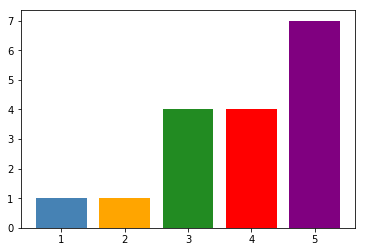

In [129]:
most_re_ID = data['UserId'].value_counts().index[0]  #Find the reviewer with the most number of reviews
x = data[data.UserId == most_re_ID]['Score'].value_counts().index.tolist()
y = data[data.UserId == most_re_ID]['Score'].value_counts().tolist()
plt.bar(x,y,color=['purple', 'r', 'forestgreen', 'orange', 'steelblue'])

## 3. Plot pandas Series DataFrame (Time->Date)

In [113]:
data3 = data['Time'] #Distract the Time colunm to a new dataframe

<BarContainer object of 10 artists>

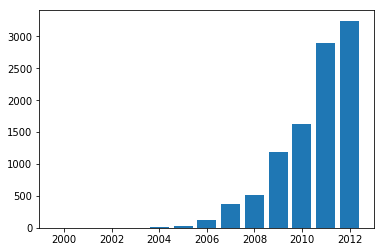

In [6]:
def time_convert(timestamp):
    time_tuple = time.localtime(timestamp)   # It will change the second term to an time object
    return time_tuple.tm_year                # and we can return the term 'year'
data3 = data['Time'].apply(time_convert)  # run every data of the column 'Time' to the convert func
# print(data3)
x = data3.value_counts().index.tolist()
y = data3.value_counts().tolist()
plt.bar(x,y)

## 4. Plot HeatMap using seaborn

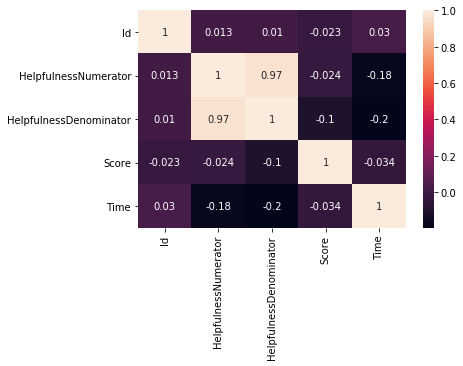

In [141]:
sns.heatmap(data.corr(),annot=True) #annot=True, show the correlation number

## 5. Helpful percent

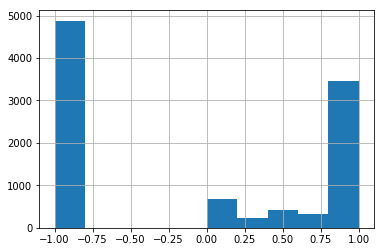

In [145]:
percent = []
for i in range(len(data)):
    n = data.loc[i]['HelpfulnessNumerator']
    d = data.loc[i]['HelpfulnessDenominator']
    if n==0 and d==0:
        percent.append(-1)
    elif n<=d:
        percent.append(float(n)/float(d))
plt.hist(percent)
plt.grid() #顯示網格線, show the grid lines
plt.show()